In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn

In [2]:
from gridWorldEnvironment import GridWorld

In [3]:
# creating gridworld environment
gw = GridWorld(gamma = .9, theta = .5)

In [4]:
def state_action_value(env):
    q = dict()
    for state, action, next_state, reward in env.transitions:
        q[(state, action)] = np.random.normal()
    return q

In [5]:
def generate_greedy_policy(env, Q):
    pi = dict()
    for state in env.states:
        actions = []
        q_values = []
        prob = []
        
        for a in env.actions:
            actions.append(a)
            q_values.append(Q[state,a])   
        for i in range(len(q_values)):
            if i == np.argmax(q_values):
                prob.append(1)
            else:
                prob.append(0)       
                
        pi[state] = (actions, prob)
    return pi

In [6]:
def greedy(env, q, state):
    actions = env.actions
    action_values = []
    for action in actions:
        action_values.append(q[state, action])
    return actions[np.argmax(action_values)]

In [12]:
def random_sample_one_step_tabular_Q_planning(env, alpha, num_iter):
    Q = state_action_value(env)
    for _ in range(num_iter):
        current_state = np.random.choice(env.states)
        while current_state != 0:
            current_state = np.random.choice(env.states)
            current_action = np.random.choice(env.actions)
            next_state, reward = env.state_transition(current_state, current_action)
            if next_state==0:
                break
            best_action = greedy(env, Q, next_state)
            Q[current_state, current_action] += alpha * (reward + env.gamma * Q[next_state, best_action] \
                                                         - Q[current_state, current_action])
    return Q

In [13]:
Q = random_sample_one_step_tabular_Q_planning(gw, 0.1, 10000)

In [14]:
pi_hat = generate_greedy_policy(gw, Q)

In [15]:
def show_policy(pi, env):
    temp = np.zeros(len(env.states) + 2)
    for s in env.states:
        a = pi_hat[s][0][np.argmax(pi_hat[s][1])]
        if a == "U":
            temp[s] = 0.25
        elif a == "D":
            temp[s] = 0.5
        elif a == "R":
            temp[s] = 0.75
        else:
            temp[s] = 1.0
            
    temp = temp.reshape(4,4)
    ax = seaborn.heatmap(temp, cmap = "prism", linecolor="#282828", cbar = False, linewidths = 0.1)
    plt.show()

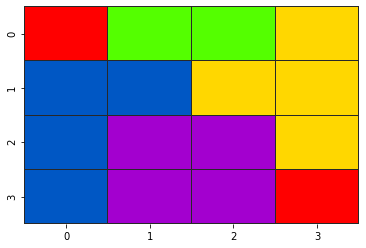

In [16]:
### RED = TERMINAL (0)
### GREEN = LEFT
### BLUE = UP
### PURPLE = RIGHT
### ORANGE = DOWN

show_policy(pi_hat, gw)